In [1]:
%%capture
# move to src folder so we can import code
%cd ../src

In [2]:
from fastai.vision.all import *

In [3]:
src = untar_data(URLs.PLANET_SAMPLE)
df = pd.read_csv(src/'labels.csv')

In [4]:
df.head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


Let's see how much labels are there

In [5]:
all_tags = df["tags"].values
all_labels = []
for row in all_tags:
    all_labels += row.split(" ")
len(all_labels)

2899

In [6]:
different_labels = set(all_labels)
len(different_labels)

17

See the distribution of these labels

In [7]:
counts = {
    label: all_labels.count(label) 
    for label in different_labels
}

counts = {
    key: value 
    for key, value in 
    sorted(
        counts.items(), 
        key = lambda item: -item[1]
    )
}

In [8]:
counts

{'primary': 934,
 'clear': 701,
 'agriculture': 318,
 'road': 209,
 'partly_cloudy': 194,
 'water': 169,
 'cultivation': 124,
 'habitation': 93,
 'haze': 55,
 'cloudy': 50,
 'bare_ground': 19,
 'blooming': 9,
 'selective_logging': 8,
 'artisinal_mine': 7,
 'slash_burn': 6,
 'conventional_mine': 2,
 'blow_down': 1}

Let's filter labels with low values (<9). Other way would be to use  oversampling, so we ensure that there are no labels in valid dataset that doesn't appear on train dataset.

In [9]:
len(df)

1000

In [10]:
for key, count in counts.items():
    if count < 10:
        df = df[df["tags"].str.contains(key) == False]

In [11]:
len(df)

968

Let's look at the images

In [12]:
df["image_name"].head(), src.ls()

(0    train_21983
 1     train_9516
 2    train_12664
 3    train_36960
 4     train_5302
 Name: image_name, dtype: object,
 (#2) [Path('/home/jcarnero/.fastai/data/planet_sample/labels.csv'),Path('/home/jcarnero/.fastai/data/planet_sample/train')])

In [13]:
(src/'train').ls()[:3]

(#3) [Path('/home/jcarnero/.fastai/data/planet_sample/train/train_26435.jpg'),Path('/home/jcarnero/.fastai/data/planet_sample/train/train_9885.jpg'),Path('/home/jcarnero/.fastai/data/planet_sample/train/train_21680.jpg')]

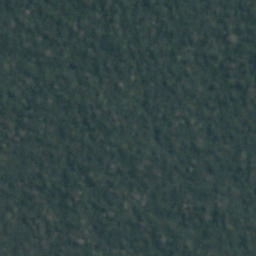

In [14]:
PILImage.create((src/'train'/'train_2407.jpg'))

In [15]:
from learner import get_dataloaders

In [16]:
dls = get_dataloaders()

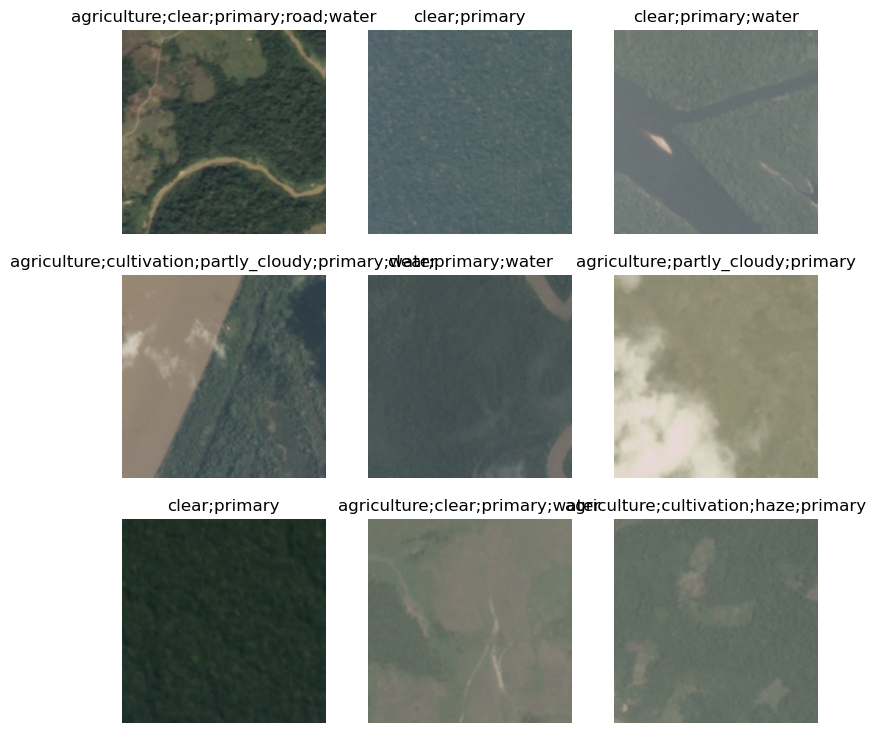

In [17]:
dls.show_batch()

In [18]:
from learner import get_learner

In [19]:
learn = get_learner()

/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0012022644514217973)

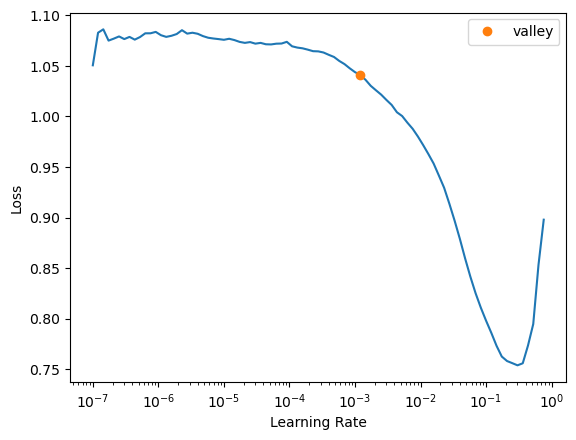

In [20]:
learn.lr_find()

In [21]:
learn = learn.load("weights")

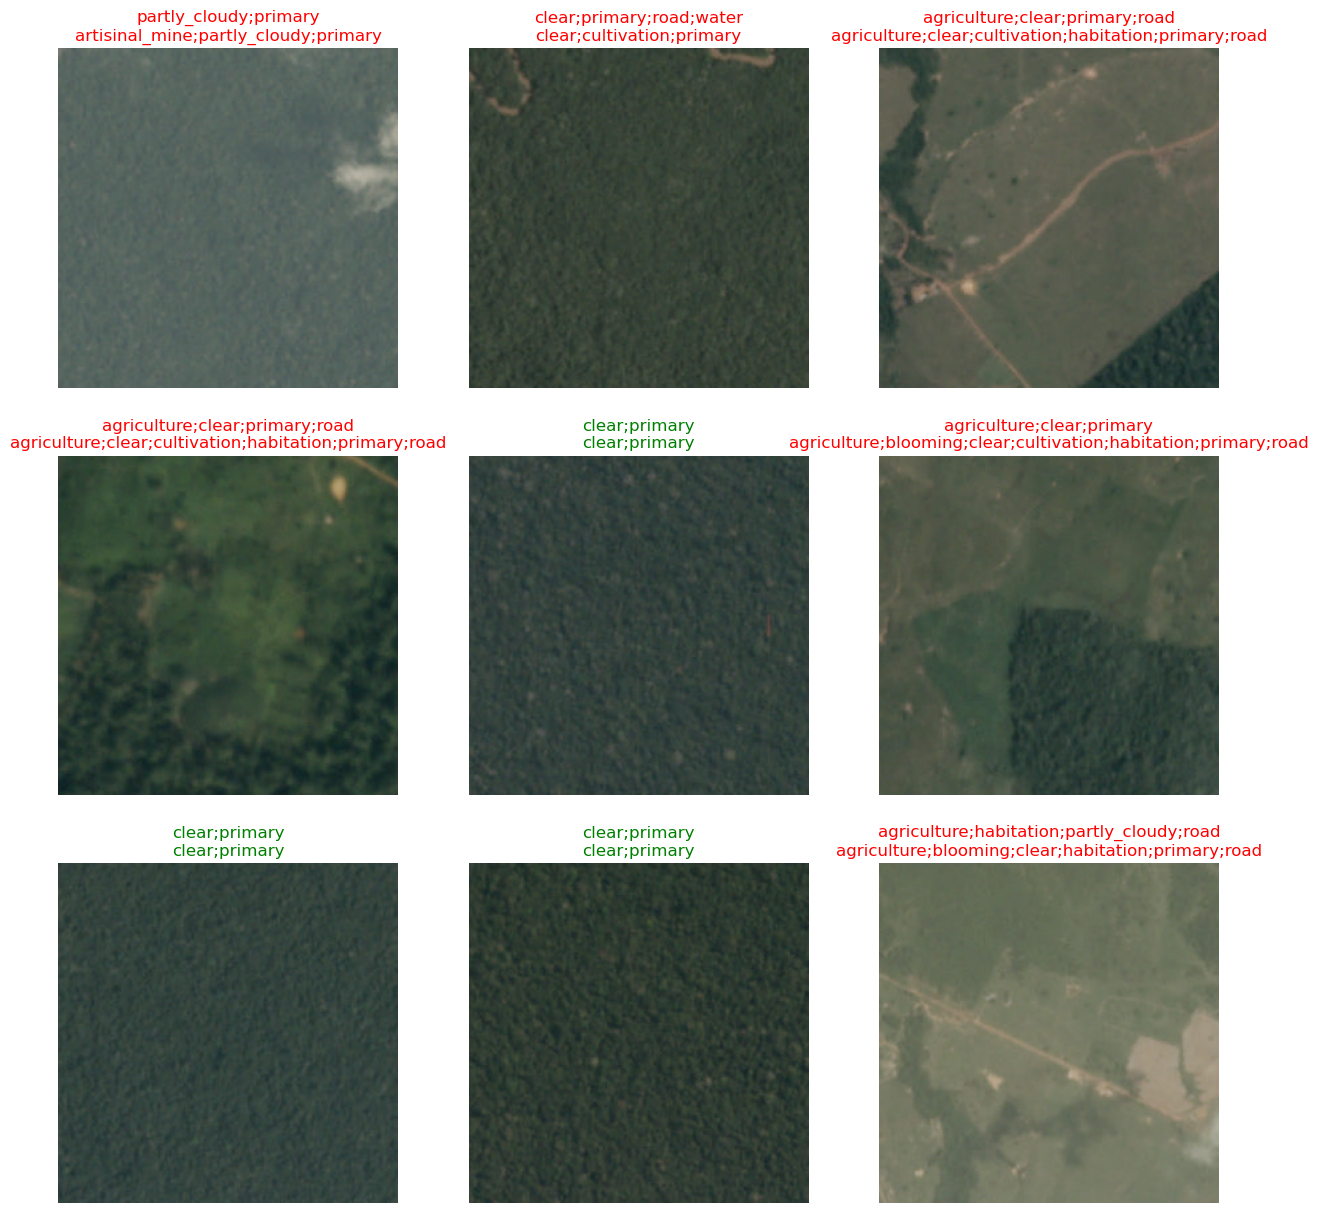

In [22]:
learn.show_results(figsize=(15,15))

In [23]:
learn.dls.vocab

['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']

Let's predict some image

In [24]:
from learner import predict

In [25]:
from torchvision.transforms import PILToTensor

In [26]:
pname = src/'train'/(df.iloc[528].image_name + ".jpg")

<AxesSubplot:>

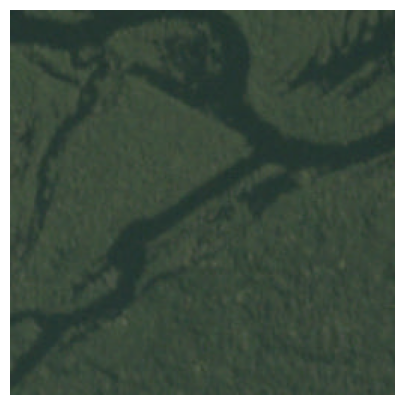

In [28]:
PILImage.create(pname).show()

In [29]:
df.iloc[528].tags

'clear primary water'

In [30]:
predict(pname)

/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


['clear', 'primary', 'water']

In [31]:
learn.predict(pname)[0]

(#3) ['clear','primary','water']